In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score  
from sklearn.metrics import recall_score  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report  

# Data Loading and Exploration:

In [ ]:

dataset = pd.read_csv('/content/diabetes_dataset.csv')

In [ ]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataset.describe()

In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.info()

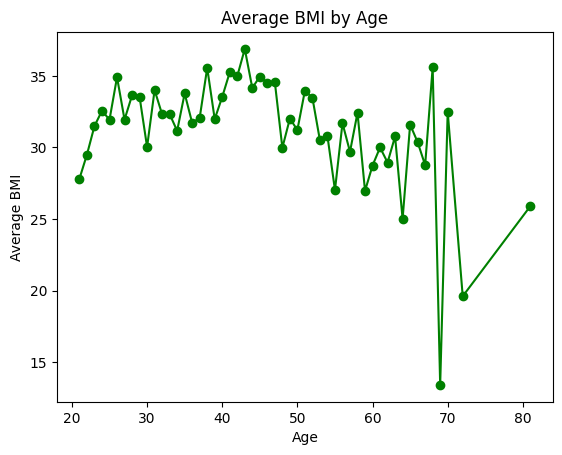

In [ ]:


avg_bmi_by_age = dataset.groupby('Age')['BMI'].mean()

# Line plot
plt.plot(avg_bmi_by_age.index, avg_bmi_by_age.values, marker='o', linestyle='-', color='green')
plt.title('Average BMI by Age')
plt.xlabel('Age')
plt.ylabel('Average BMI')
plt.show()


# Data Preprocessing:

In [ ]:


def replace_zero_with_median(dataset, columns_to_impute):
    
    imputer = SimpleImputer(strategy='median')

    
    for column_name in columns_to_impute:
        
        if column_name in dataset.columns:
            
            dataset[column_name] = dataset[column_name].replace(0, float('nan'))

           
            dataset[column_name] = imputer.fit_transform(dataset[[column_name]]).flatten()
        else:
            print(f"Column '{column_name}' not found in the DataFrame.")

    return dataset
columns_to_impute = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
dataset = replace_zero_with_median(dataset, columns_to_impute)


In [ ]:
dataset

In [ ]:


x = dataset.drop(columns ='Outcome')
y = dataset['Outcome']

In [ ]:
x

In [ ]:
y

# ALGORITHM:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'class_weight': ['balanced', {0: 1, 1: 2}],  
}


grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  
    scoring='recall',  
    verbose=2,
    n_jobs=-1  
)


grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_


print("Best parameters found: ", grid_search.best_params_)


y_pred = best_model.predict(x_test)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'class_weight': {0: 1, 1: 2}, 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}


# Evaluation:

In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)
print("Confusion Matrix:", conf_matrix)
print("Classification Report:",class_report)

Accuracy = 0.7792207792207793
Precision = 0.6567164179104478
Recall = 0.8
Confusion Matrix: [[76 23]
 [11 44]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.77      0.82        99
           1       0.66      0.80      0.72        55

    accuracy                           0.78       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.80      0.78      0.78       154

